In [123]:
import pandas as pd
import datetime                                       
import calendar                                        


import numpy as np
import seaborn as sns
import sklearn.metrics as metrics                     
import scipy as sp




# EXPLORATORY DATA ANALYSIS 

In [124]:
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [125]:
print("Shape of features dataframe :")
print(features.shape)
print("Shape of stores dataframe: ")
print(stores.shape)
print("Shape of training dataframe: ")
print(df.shape)
print("Shape of test dataframe: ")
print(test.shape)




Shape of features dataframe :
(8190, 12)
Shape of stores dataframe: 
(45, 3)
Shape of training dataframe: 
(421570, 5)
Shape of test dataframe: 
(115064, 4)


In [126]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [127]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [128]:
df.head(1000)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
995,1,7,2012-09-21,22542.44,False
996,1,7,2012-09-28,22343.24,False
997,1,7,2012-10-05,22071.39,False
998,1,7,2012-10-12,20212.71,False


In [129]:
df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [130]:
test.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


WE CAN SEE THAT BOTH TRAIN SET AND TEST SET HAVE SIMILAR MEAN , STD , MEDIAN, MIN AND MAX VALUES

we do inner joins on the common keys of features and df (Date,IsHoliday,Store) as well as common key of store and the resulting inner
join ('Store')

In [131]:
train = df.merge(features, on = ['Date','IsHoliday','Store'])
train = train.merge(stores,on = ['Store'])
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [132]:
train['Date'] = pd.to_datetime(train['Date'])
train['Week'] = train['Date'].dt.week
train['Year'] = train['Date'].dt.year
train['Day'] = train['Date'].dt.day
train['DayOfWeek'] = train['Date'].dt.dayofweek


<ipython-input-132-7c76d0fa449d>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['Week'] = train['Date'].dt.week


In [133]:
holiday = train[['Date','Week','Year','IsHoliday']]
holiday = holiday.loc[holiday['IsHoliday']==True].drop_duplicates()
holiday

,Date,Week,Year,IsHoliday
73,2010-02-12,6,2010,True
2218,2010-09-10,36,2010,True
3014,2010-11-26,47,2010,True
3372,2010-12-31,52,2010,True
3800,2011-02-11,6,2011,True
5940,2011-09-09,36,2011,True
6731,2011-11-25,47,2011,True
7096,2011-12-30,52,2011,True
7527,2012-02-10,6,2012,True
9667,2012-09-07,36,2012,True


FROM THE ABOVE WE CAN SEE THAT WEEK 6, WEEK 36 WEEK 47 AND WEEK 52 ARE THE HOLIDAYS

In [134]:
import seaborn as sns

In [135]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in c:\users\personal\miniconda3\lib\site-packages (0.11.1)


In [136]:
grouped=stores.groupby('Type')
grouped.describe()

Store                                                        Size  \
     count       mean        std   min    25%   50%    75%   max count   
Type                                                                     
A     22.0  22.227273  13.078269   1.0  11.50  25.0  32.75  41.0  22.0   
B     17.0  18.352941  11.028039   3.0  10.00  17.0  23.00  45.0  17.0   
C      6.0  39.000000   5.215362  30.0  37.25  40.0  42.75  44.0   6.0   

                                                                           \
               mean           std      min        25%       50%       75%   
Type                                                                        
A     177247.727273  49392.621098  39690.0  155840.75  202406.0  203819.0   
B     101190.705882  32371.137916  34875.0   93188.00  114533.0  123737.0   
C      40541.666667   1304.145033  39690.0   39745.00   39910.0   40774.0   

                
           max  
Type            
A     219622.0  
B     140167.0  
C      42988.0

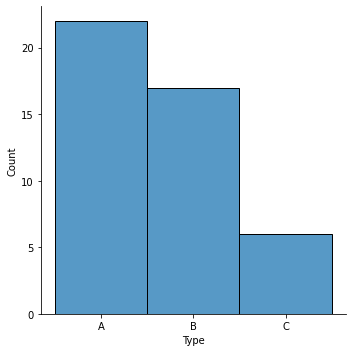

In [137]:
sns.displot(x="Type", data=stores)

so there are total 45 stores and type A store --> 22, type B store --> 17 , C store --> 6

<AxesSubplot:xlabel='Type', ylabel='Size'>

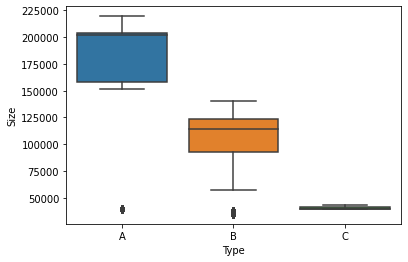

In [138]:
sns.boxplot(x=train["Type"], y = train["Size"])

WE can SEE from THE BOX-PLOT ABOVE that TYPE A is THE LARGEST STORE and TYPE C is THE SMALLEST.
    ALSO there is no overlapped area in size among A, B, and C. Type is the best predictor for Size.

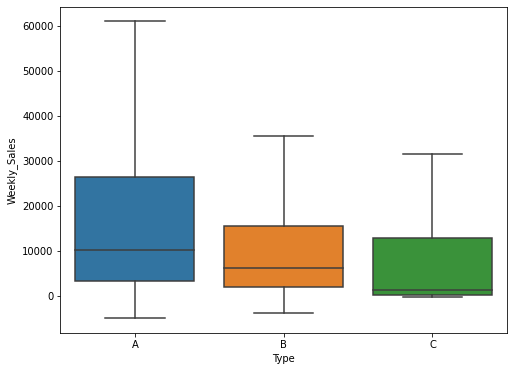

In [139]:
data = pd.concat([train['Type'], train['Weekly_Sales']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=data, showfliers=False)

So type A store has higher median sales. Which is what one would expect. bigger stores higher sales

C:\Users\PERSONAL\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

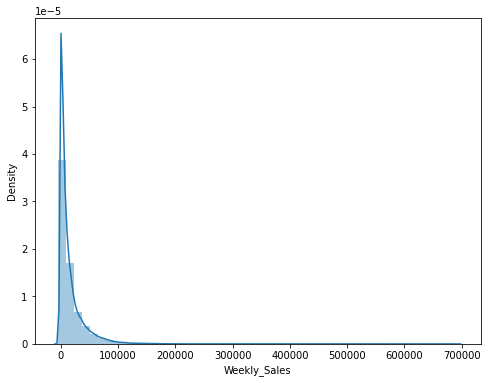

In [140]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(train['Weekly_Sales'])

This shows the distribution of Weekly_Sales is skewed to the left 

In [141]:
print("Skewness is : ", train['Weekly_Sales'].skew())
print("Kurtosis is : ", train['Weekly_Sales'].kurtosis())

Skewness is :  3.262008185465662
Kurtosis is :  21.491289908326177


Temperature is Seasonal which is what one would expect

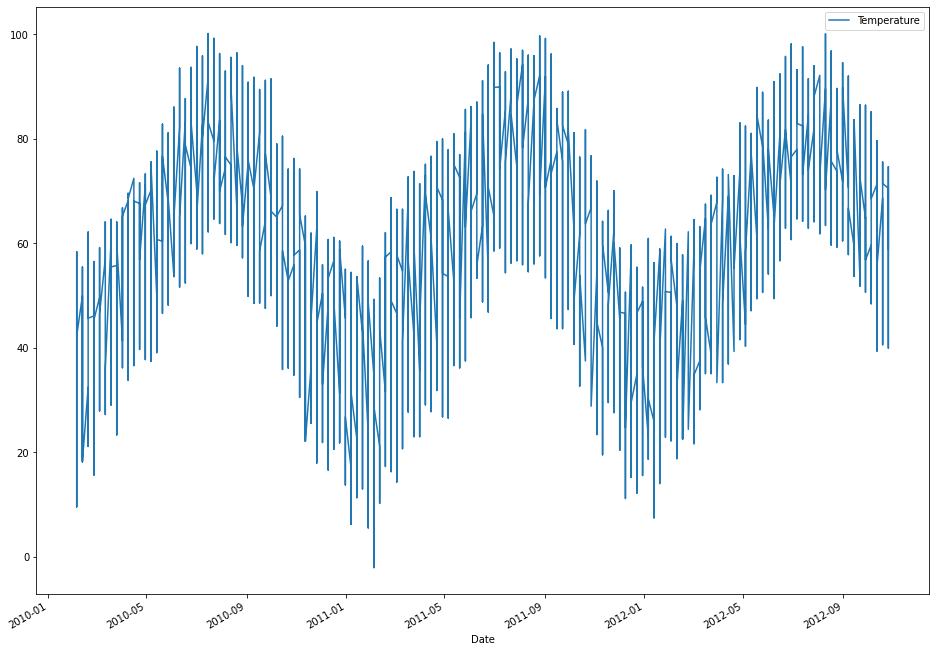

In [142]:
train[['Date', 'Temperature']].plot(x='Date',figsize = (16,12))

plt.show()

One can clearly see that temperature is seasonal as one would expect 

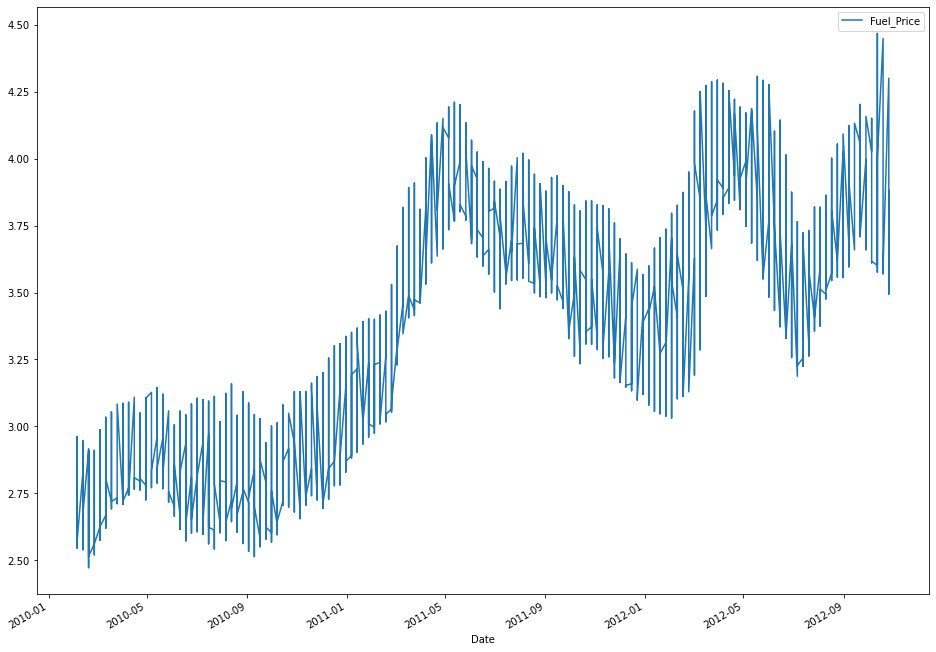

In [143]:
train[['Date', 'Fuel_Price']].plot(x='Date',figsize = (16,12))

plt.show()

Fuel price seems to have a overall upward trend just like we are experiencing now   :( 

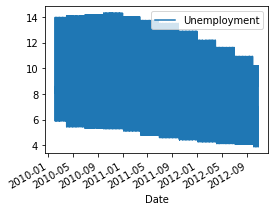

In [144]:
train[['Date', 'Unemployment']].plot(x='Date',figsize = (4,3))

plt.show()

Unemployment seems to have a downward trend :)

Correlation between all features

[]

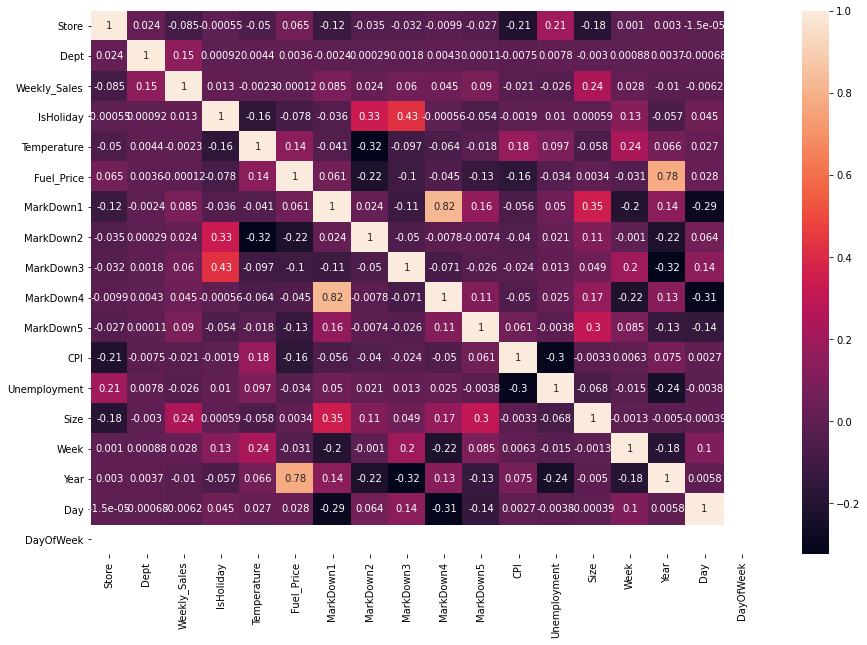

In [145]:
corr = train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

There seems to be positive correlation betwee Markdown2 , Markdown3 and IsHoliday

CORRELATION BETWEEN WEEKLY SALES AND INPUT FEATURES 

In [146]:
corr["Weekly_Sales"]

Store          -0.085195
Dept            0.148032
Weekly_Sales    1.000000
IsHoliday       0.012774
Temperature    -0.002312
Fuel_Price     -0.000120
MarkDown1       0.085251
MarkDown2       0.024130
MarkDown3       0.060385
MarkDown4       0.045414
MarkDown5       0.090362
CPI            -0.020921
Unemployment   -0.025864
Size            0.243828
Week            0.027673
Year           -0.010111
Day            -0.006187
DayOfWeek            NaN
Name: Weekly_Sales, dtype: float64

This shows Size has the highest correlation with weekly sales
Dept also has positive correlation with weekly sales
Markdowns are poorly correlated with Weekly sales

MISSING VALUES

In [147]:
missing = features.isnull().sum()
missing 

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [148]:
mis_cols = ["MarkDown1", "MarkDown2","MarkDown3","MarkDown4","MarkDown5","CPI","Unemployment"]
for j in mis_cols:
    print(j + " NaNs "+  ": ")
    print(str(missing[j]*100/8190) + " %")

MarkDown1 NaNs : 
50.76923076923077 %
MarkDown2 NaNs : 
64.33455433455434 %
MarkDown3 NaNs : 
55.885225885225886 %
MarkDown4 NaNs : 
57.704517704517706 %
MarkDown5 NaNs : 
50.54945054945055 %
CPI NaNs : 
7.142857142857143 %
Unemployment NaNs : 
7.142857142857143 %


CPI and Unemployment has a small percentage of missing values. So we decide to fill them with their median and others with 0

In [149]:
from statistics import median 
for j in mis_cols[:5]:
    train[j] = train[j].fillna(0)
for j in mis_cols[5:]:
    train[j] = train[j].fillna(median(train[j]))

In [150]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Week            0
Year            0
Day             0
DayOfWeek       0
dtype: int64

Conclusions of Exploratory Data analysis :
1. There are some enviornmental features like temperature, Fuel price, Unemployment rate,CPI index which are independent of the 
stores and departments.
2. Most markdown values are missing
3. Temperature is seasonal, Fuel Price has a upward trend, Unemployment rate has downward trend.
4. Type A stores are the largest and have the highest sales while C is the smallest and has the lowest sales. So Type and Sales are related and are good predictor for weekly sales
5. There are 45 stores 22 type A , 17 type B, 7 type C 




In [151]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year,Day,DayOfWeek
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010,5,4
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010,5,4
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010,5,4
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010,5,4
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010,5,4


In [152]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [153]:
test = test.merge(features, on = ['Date','IsHoliday','Store'])
test = test.merge(stores,on = ['Store'])
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315


In [154]:
test['Date'] = pd.to_datetime(test['Date'])
test['Week'] = test['Date'].dt.week
test['Year'] = test['Date'].dt.year
test['Day'] = test['Date'].dt.day
test['DayOfWeek'] = test['Date'].dt.dayofweek


<ipython-input-154-47f24d828eaa>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test['Week'] = test['Date'].dt.week


In [155]:
t = pd.get_dummies(train.Type)
train =pd.concat([train,t], axis=1)
train = train.drop('Type',axis = 1)

train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,CPI,Unemployment,Size,Week,Year,Day,DayOfWeek,A,B,C
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,...,211.096358,8.106,151315,5,2010,5,4,1,0,0
1,1,2,2010-02-05,50605.27,False,42.31,2.572,0.0,0.0,0.0,...,211.096358,8.106,151315,5,2010,5,4,1,0,0
2,1,3,2010-02-05,13740.12,False,42.31,2.572,0.0,0.0,0.0,...,211.096358,8.106,151315,5,2010,5,4,1,0,0
3,1,4,2010-02-05,39954.04,False,42.31,2.572,0.0,0.0,0.0,...,211.096358,8.106,151315,5,2010,5,4,1,0,0
4,1,5,2010-02-05,32229.38,False,42.31,2.572,0.0,0.0,0.0,...,211.096358,8.106,151315,5,2010,5,4,1,0,0


In [156]:
t = pd.get_dummies(test.Type)
test =pd.concat([test,t], axis=1)
test = test.drop('Type',axis = 1)

test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Size,Week,Year,Day,DayOfWeek,A,B,C
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,223.462779,6.573,151315,44,2012,2,4,1,0,0
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,223.462779,6.573,151315,44,2012,2,4,1,0,0
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,223.462779,6.573,151315,44,2012,2,4,1,0,0
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,223.462779,6.573,151315,44,2012,2,4,1,0,0
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,...,223.462779,6.573,151315,44,2012,2,4,1,0,0


In [157]:
train = train.drop(columns = ['Date'],axis = 1)
test = test.drop(columns = ['Date'],axis = 1)


In [158]:
train.replace({False: 0, True: 1},inplace=True)
test.replace({False: 0, True: 1},inplace=True)

In [159]:
train

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,CPI,Unemployment,Size,Week,Year,Day,DayOfWeek,A,B,C
0,1,1,24924.50,0,42.31,2.572,0.00,0.00,0.0,0.00,...,211.096358,8.106,151315,5,2010,5,4,1,0,0
1,1,2,50605.27,0,42.31,2.572,0.00,0.00,0.0,0.00,...,211.096358,8.106,151315,5,2010,5,4,1,0,0
2,1,3,13740.12,0,42.31,2.572,0.00,0.00,0.0,0.00,...,211.096358,8.106,151315,5,2010,5,4,1,0,0
3,1,4,39954.04,0,42.31,2.572,0.00,0.00,0.0,0.00,...,211.096358,8.106,151315,5,2010,5,4,1,0,0
4,1,5,32229.38,0,42.31,2.572,0.00,0.00,0.0,0.00,...,211.096358,8.106,151315,5,2010,5,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,0,58.85,3.882,4018.91,58.08,100.0,211.94,...,192.308899,8.667,118221,43,2012,26,4,0,1,0
421566,45,94,5203.31,0,58.85,3.882,4018.91,58.08,100.0,211.94,...,192.308899,8.667,118221,43,2012,26,4,0,1,0
421567,45,95,56017.47,0,58.85,3.882,4018.91,58.08,100.0,211.94,...,192.308899,8.667,118221,43,2012,26,4,0,1,0
421568,45,97,6817.48,0,58.85,3.882,4018.91,58.08,100.0,211.94,...,192.308899,8.667,118221,43,2012,26,4,0,1,0


# BUILDING MODELS 


Evaluation metrics to be used:
1. Mean-Absolute Error
2. Mean-Squared Error
3. R2 score 



Models:
1. Lasso
2. Ridge
3. Decision Tree Regressor
4. Extra Tree Regressor



In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

In [161]:
X = train.drop(columns = ["Weekly_Sales"],axis = 1)
y = train["Weekly_Sales"]



In [162]:
X_train,X_test,y_train,y_test=train_test_split( X, y, test_size=0.20, random_state=0)
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Fitting the Lasso Model 

In [163]:

from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)

Lasso(alpha=0.1)

In [164]:
pred = clf.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.08908591352025219


In [165]:
print("MAE is : ",metrics.mean_absolute_error(y_test,pred))
print("MSE is : ",metrics.mean_squared_error(y_test,pred))

MAE is :  14585.81141024348
MSE is :  476968651.1329911


In [166]:
from sklearn.linear_model import Ridge
rd = linear_model.Ridge(alpha=0.1)
rd.fit(X_train, y_train)

Ridge(alpha=0.1)

In [167]:
pred = clf.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.08908591352025219


In [168]:
print("MAE is : ",metrics.mean_absolute_error(y_test,pred))
print("MSE is : ",metrics.mean_squared_error(y_test,pred))

MAE is :  14585.81141024348
MSE is :  476968651.1329911


In [169]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9625501689187077


In [170]:
print("MAE is : ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE is : ",metrics.mean_squared_error(y_test,y_pred))

MAE is :  1754.9250458998504
MSE is :  19609308.58477782


In [171]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=30,n_jobs=4) 
etr.fit(X_train,y_train)
y_pred=etr.predict(X_test)

In [172]:

from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9739933979992803


In [173]:
print("MAE is : ",metrics.mean_absolute_error(y_test,y_pred))
print("MSE is : ",metrics.mean_squared_error(y_test,y_pred))

MAE is :  1383.1748856668064
MSE is :  13617457.519811427


Clearly ExtraTreeRegressor is the best model here . 

Fitting on the test dataframe with ExtraTreeRegessor

In [174]:
from statistics import median 
for j in mis_cols[:5]:
    test[j] = test[j].fillna(0)
for j in mis_cols[5:]:
    test[j] = test[j].fillna(median(test[j]))

In [175]:
final_pred = etr.predict(test)

In [176]:
sampleSubmission = pd.read_csv('sampleSubmission.csv')

In [177]:
sampleSubmission['Weekly_Sales'] = final_pred
sampleSubmission.to_csv('submission.csv',index=False)
sampleSubmission

,Id,Weekly_Sales
0,1_1_2012-11-02,18022.148667
1,1_1_2012-11-09,7700.667000
2,1_1_2012-11-16,7700.667000
3,1_1_2012-11-23,7700.667000
4,1_1_2012-11-30,7700.667000
...,...,...
115059,45_98_2013-06-28,1084.044000
115060,45_98_2013-07-05,1084.044000
115061,45_98_2013-07-12,1084.044000
115062,45_98_2013-07-19,1084.044000
